In [5]:
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
import seaborn as sns

In [2]:
# Load the Iris dataset from a CSV file
iris_df = pd.read_csv('iris.csv')

iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
print(iris_df.head(61))

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0    1            5.1           3.5            1.4           0.2   
1    2            4.9           3.0            1.4           0.2   
2    3            4.7           3.2            1.3           0.2   
3    4            4.6           3.1            1.5           0.2   
4    5            5.0           3.6            1.4           0.2   
..  ..            ...           ...            ...           ...   
56  57            6.3           3.3            4.7           1.6   
57  58            4.9           2.4            3.3           1.0   
58  59            6.6           2.9            4.6           1.3   
59  60            5.2           2.7            3.9           1.4   
60  61            5.0           2.0            3.5           1.0   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
56  Iris-versicolor  
57  Iri

# Data Visulazation 

C:\Users\91630\AppData\Local\Temp\ipykernel_13280\4017003827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris_df.corr()


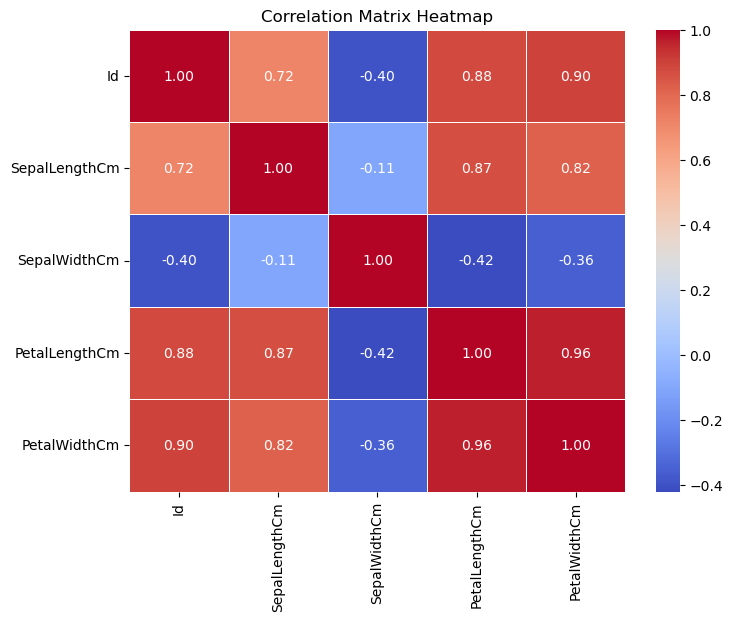

In [6]:
# Calculate the correlation matrix
correlation_matrix = iris_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


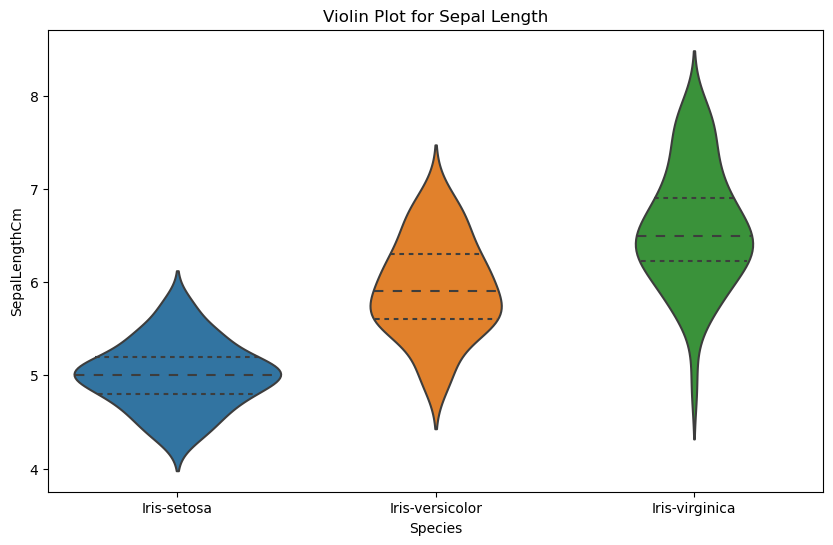

In [27]:
# Violin Plot for Sepal Length
plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='SepalLengthCm', data=iris_df, inner='quartile')
plt.title('Violin Plot for Sepal Length')
plt.show()


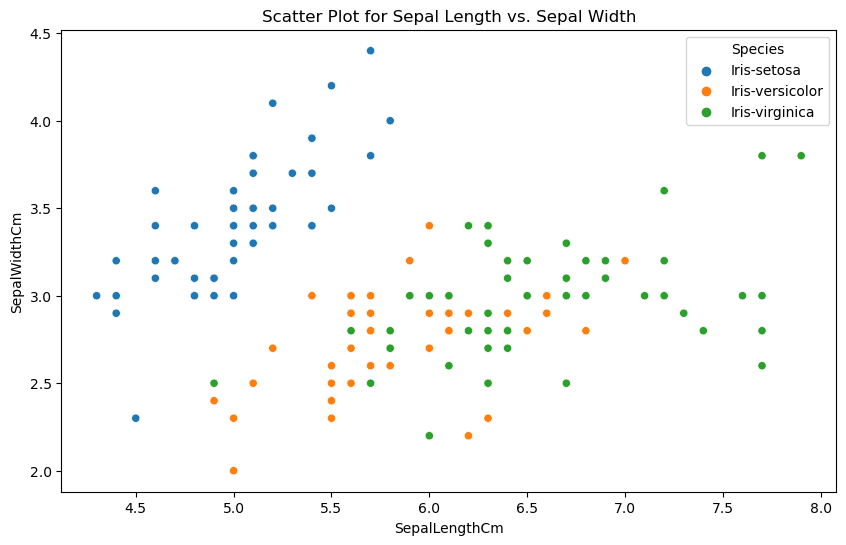

In [29]:
# Scatter Plot for Sepal Length and Sepal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris_df)
plt.title('Scatter Plot for Sepal Length vs. Sepal Width')
plt.show()


In [12]:
# Assuming the target variable is in a column named 'Species' 
X = iris_df.drop('Species', axis=1)  # Features: sepal length, sepal width, petal length, petal width
y = iris_df['Species']  # Target labels: Setosa, Versicolor, Virginica

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [45]:
# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

In [47]:
# Evaluate the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [48]:
# Display the Decision Tree rules
tree_rules = export_text(dt_classifier, feature_names=X.columns.tolist())
print("Decision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- Id <= 100.50
|   |--- Id <= 50.00
|   |   |--- class: Iris-setosa
|   |--- Id >  50.00
|   |   |--- class: Iris-versicolor
|--- Id >  100.50
|   |--- class: Iris-virginica



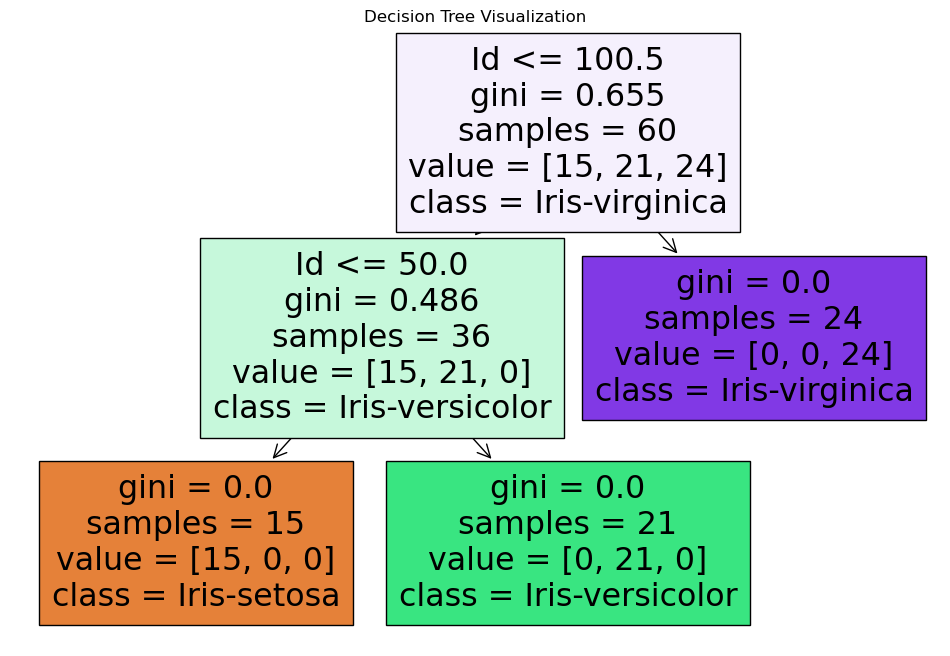

In [49]:
# Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=iris_df['Species'].unique(), filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [50]:
# Modify the new data to have 5 features
# Example: Assume the additional features are 0.1 and 0.3 for the two data points
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# Predict categories for the new data using the trained decision tree
predicted_categories = dt_classifier.predict(new_data)

# Print the predicted categories for the new data
print("Predicted Categories for the New Data:",predicted_categories)


Enter sepal length: 0.3
Enter sepal width: 1.2
Enter petal length: 0.6
Enter petal width: 1.9
Predicted Categories for the New Data: ['Iris-setosa' 'Iris-setosa']


C:\Users\91630\New folder\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
